## Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('F:/Python/Data/tcc.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Preparation

In [9]:
# "TotalCharges" is numeric, but the data type is 'object'
# It needs to be converted to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
# Checking the number of missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273328766D8>,
      dtype=object)

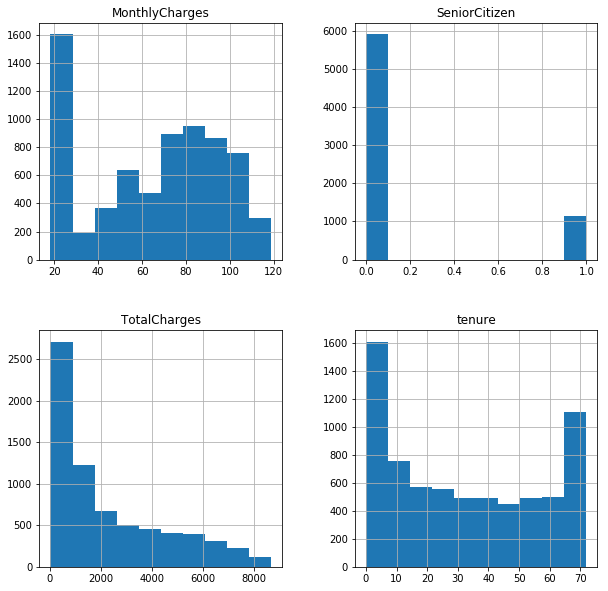

In [11]:
df.hist(figsize=(10,10))

In [12]:
df['TotalCharges'].median()

1397.475

In [13]:
df['TotalCharges'].mean()

2283.3004408418697

There are 11 missing in 'TotalCharges' and the distribution seems skewed, so we will fill the missing data with median

In [14]:
# Fill missing data with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# Dropping 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Converting target variable to binary number
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## EDA

### 1. Correlation

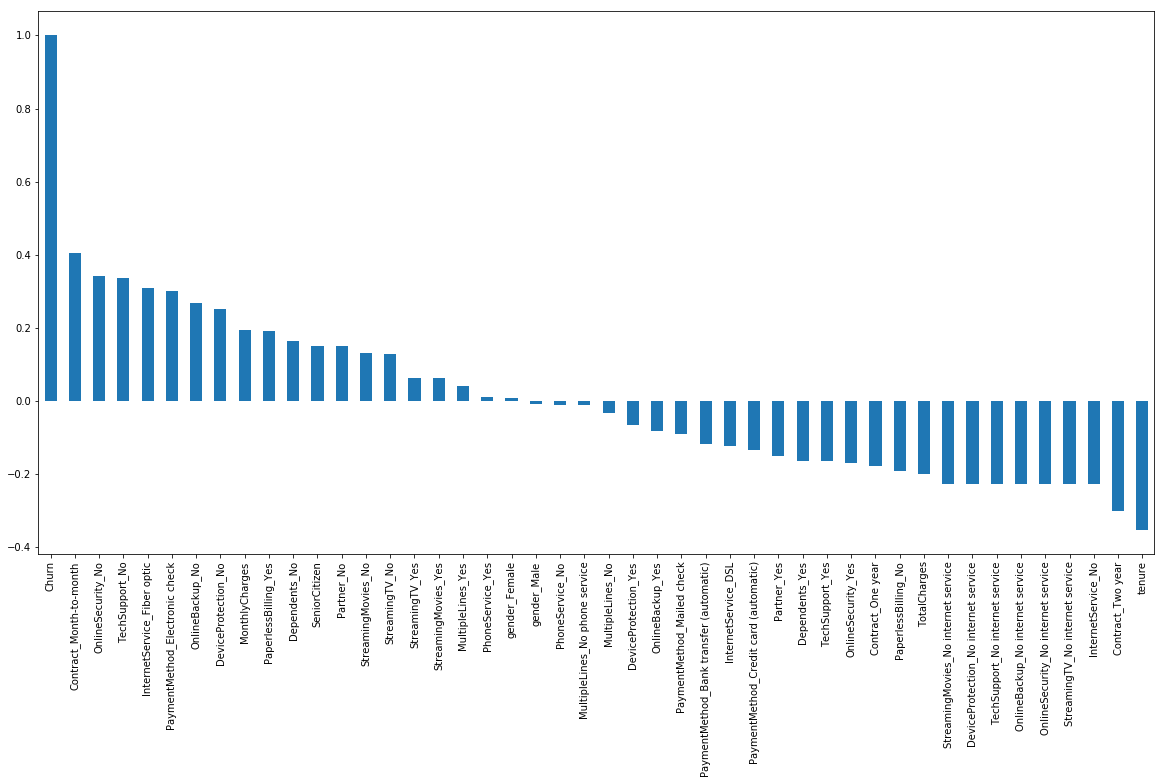

In [20]:
plt.figure(figsize=(20,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [21]:
corr = df_dummies.corr()
corr.style.background_gradient(cmap='coolwarm')

In [22]:
df.describe(include = 'object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273343D15F8>,
      dtype=object)

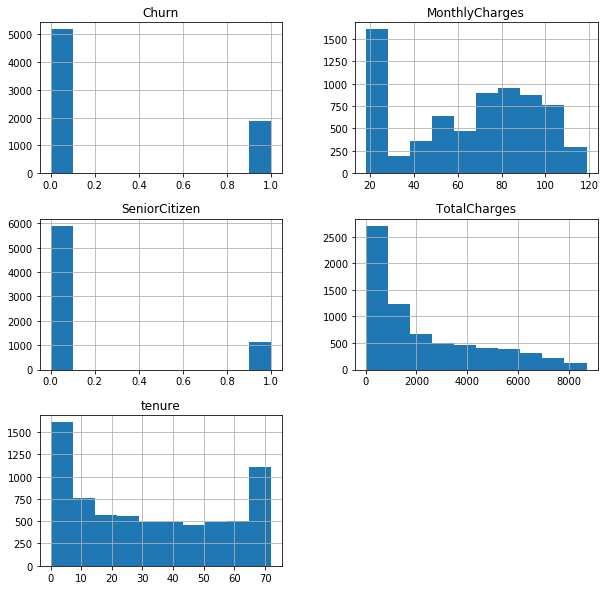

In [23]:
df.hist(figsize=(10,10))

In [24]:
df['tenure'].mean()

32.37114865824223

Now we know:
    - Most customers are not Senior
    - Average length of a customer is 32.37 months
    - More than half custmoers do not have dependents
    - Most custmoers have phone service
    - Most popular contract type is month-to-month
    - Most customers prefer paperless billing
    - Most popular payment method is Electronic check

### 2. # of Churns

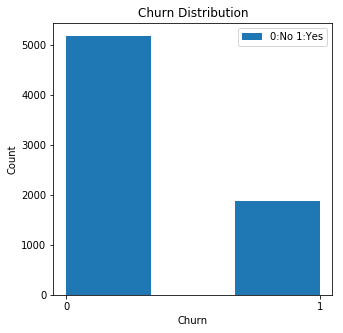

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df['Churn'], label='0:No 1:Yes', bins=3)
plt.xticks(ticks=[0,1])
ax.legend(loc='upper right')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

### 3. Gendar

In [26]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
import matplotlib.ticker as mtick

Text(0.5, 1.0, 'Gender Distribution')

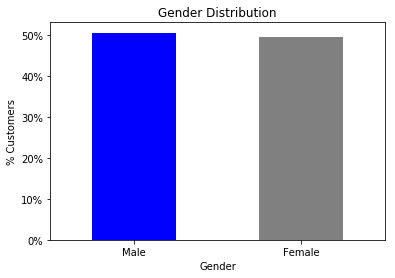

In [28]:
colors = ['blue','grey']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

### 4. Senior Citizens

In [29]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [30]:
pd.crosstab(df['Churn'], df['SeniorCitizen'],margins = True)

SeniorCitizen,0,1,All
Churn,,,
0,4508,666,5174
1,1393,476,1869
All,5901,1142,7043


In [31]:
print('The percentage of senior citizens who left the company: {}%'.format(round(476/1142*100,ndigits=2)))
print('The young people is: {}%'.format(round(1393/5901*100,ndigits=2)))

The percentage of senior citizens who left the company: 41.68%
The young people is: 23.61%


In [32]:
import seaborn as sns

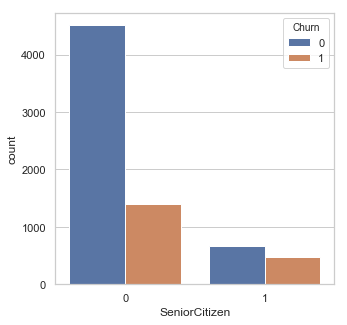

In [33]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['SeniorCitizen'], hue=df['Churn'])
plt.show()

### 5. Dependents Status

#### 5.1 Dependents & Churn

In [34]:
pd.crosstab(df['Churn'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Churn,,,
0,3390,1784,5174
1,1543,326,1869
All,4933,2110,7043


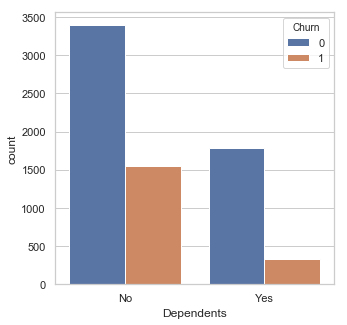

In [35]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Dependents'], hue=df['Churn'])
plt.show()

#### 5.2 Dependents & Partner

In [36]:
pd.crosstab(df['Dependents'], df['Partner'],margins = True)

Partner,No,Yes,All
Dependents,,,
No,3280,1653,4933
Yes,361,1749,2110
All,3641,3402,7043


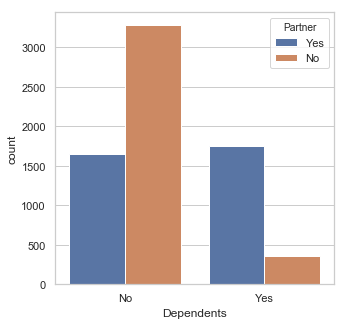

In [37]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Dependents'], hue=df['Partner'])
plt.show()

### 6. Partner

In [38]:
pd.crosstab(df['Partner'], df['Churn'],margins = True)

Churn,0,1,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


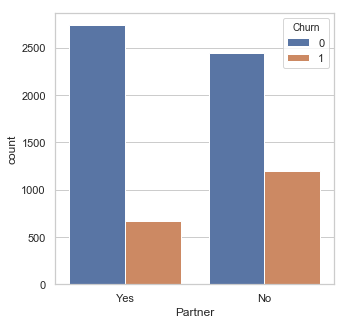

In [39]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Partner'], hue=df['Churn'])
plt.show()

### 7. Billing

In [40]:
pd.crosstab(df['PaperlessBilling'], df['Churn'],margins = True)

Churn,0,1,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


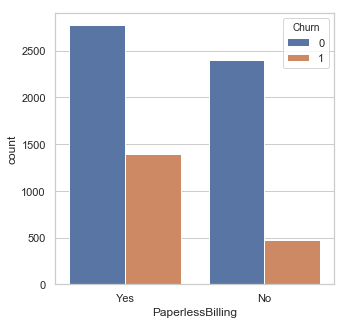

In [41]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['PaperlessBilling'], hue=df['Churn'])
plt.show()

### 8. Contract Type

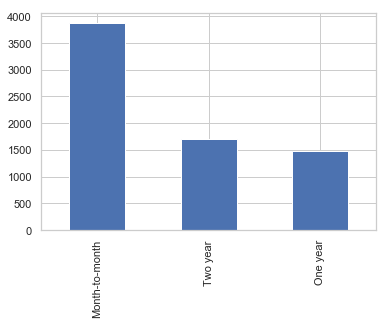

In [42]:
df['Contract'].value_counts().plot(kind='bar')

In [43]:
pd.crosstab(df['Contract'], df['Churn'],margins = True)

Churn,0,1,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


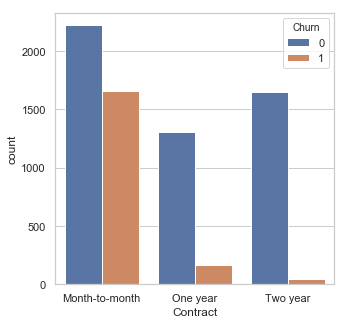

In [44]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Churn'])
plt.show()

#### 8.1 Contract & Dependent

In [45]:
pd.crosstab(df['Contract'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Contract,,,
Month-to-month,3086,789,3875
One year,942,531,1473
Two year,905,790,1695
All,4933,2110,7043


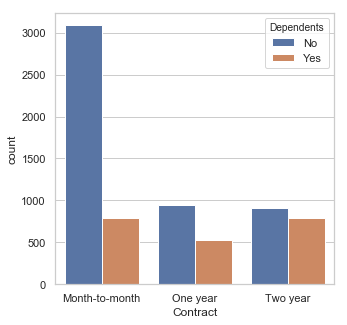

In [46]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Dependents'])
plt.show()

In [47]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Two Year Contract')

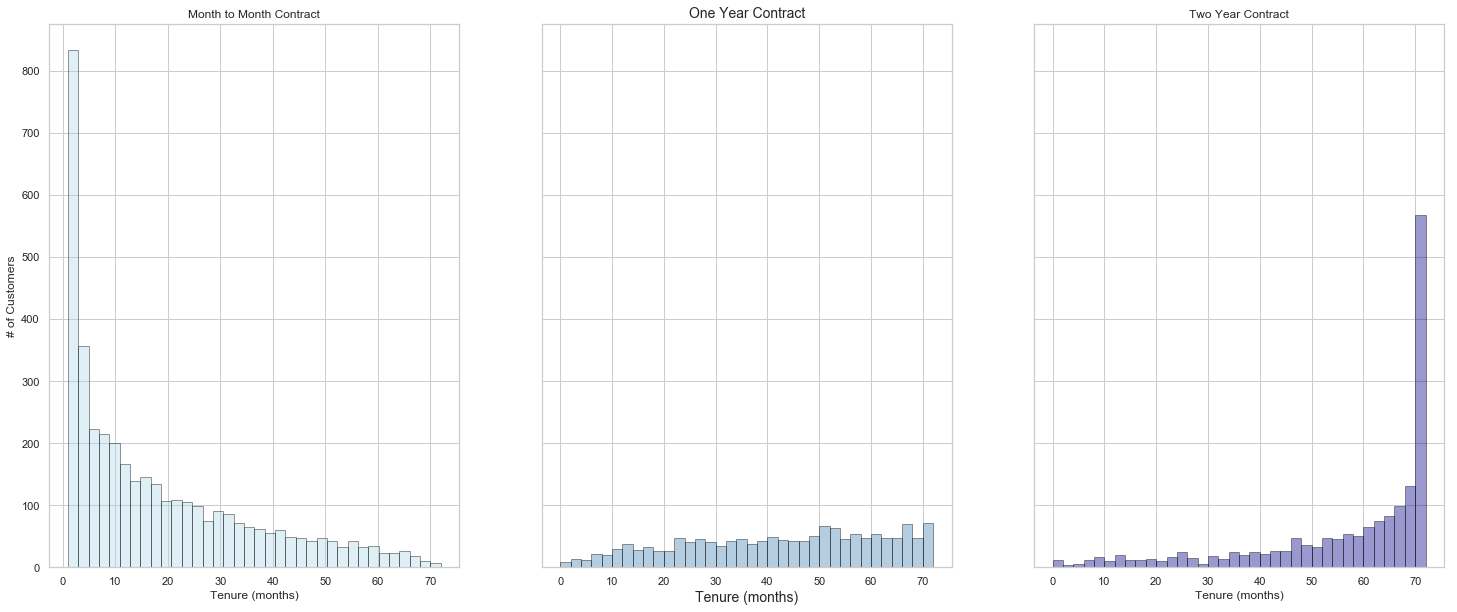

In [48]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (25,10))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'lightblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

## Modeling

In [49]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


### Perceptron

In [51]:
from sklearn.linear_model import Perceptron

In [52]:
ppn_para = {'max_iter': [100, 300, 500, 1000, 1500, 2000], 'eta0': [0.001, 0.01, 0.05, 0.1, 0.5],
           'random_state': [0], 'tol': [0.001, 0.01, 0.05, 0.1, 0.5]}

In [53]:
ppn = GridSearchCV(estimator=Perceptron(), param_grid=ppn_para, scoring='accuracy', n_jobs=-1, cv=10)

In [54]:
ppn.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [100, 300, 500, 1000, 1500, 2000], 'eta0': [0.001, 0.01, 0.05, 0.1, 0.5], 'random_state': [0], 'tol': [0.001, 0.01, 0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
from sklearn.metrics import accuracy_score

In [57]:
y_ppn_pred = ppn.predict(X_test_std)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_ppn_pred))
print(confusion_matrix(y_test, y_ppn_pred))
print(classification_report(y_test,y_ppn_pred))
print('Best score:', ppn.best_score_)

Accuracy: 0.7454
[[1187  373]
 [ 165  388]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1560
           1       0.51      0.70      0.59       553

   micro avg       0.75      0.75      0.75      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.75      0.76      2113

Best score: 0.7505070993914807


In [60]:
ppn.best_estimator_.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 0.001,
 'fit_intercept': True,
 'max_iter': 100,
 'n_iter': None,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Logistic

In [74]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_para = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [61]:
lr = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_para, scoring='accuracy', n_jobs=-1, cv=10)
lr.fit(X_train_std, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
y_lr_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))
print('Best Params:',lr.best_params_)
print('Best score:', lr.best_score_)

Accuracy: 0.8031
[[1396  164]
 [ 252  301]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.65      0.54      0.59       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Best Params: {'C': 10.0, 'penalty': 'l1'}
Best score: 0.8044624746450304


In [65]:
lr.best_estimator_.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
lr_plot = LogisticRegression(penalty='l1', dual=False, tol=0.0001, 
                             C=10.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=None, solver='warn', 
                             max_iter=100, multi_class='warn', verbose=0, 
                             warm_start=False, n_jobs=None)

In [76]:
lr_plot.fit(X_train_std, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_lr_plot_pred = lr_plot.predict(X_test_std)

In [68]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_plot_pred))

Accuracy: 0.8031


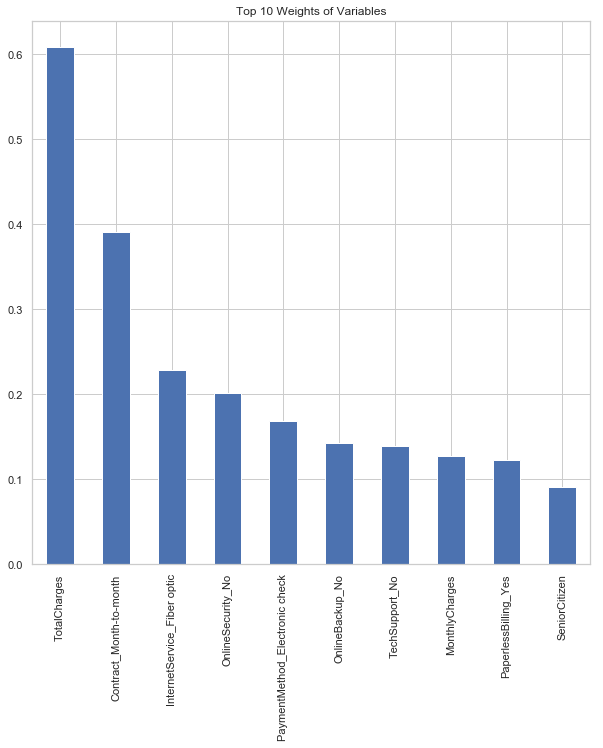

In [95]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Weights of Variables')
weights = pd.Series(lr_plot.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')


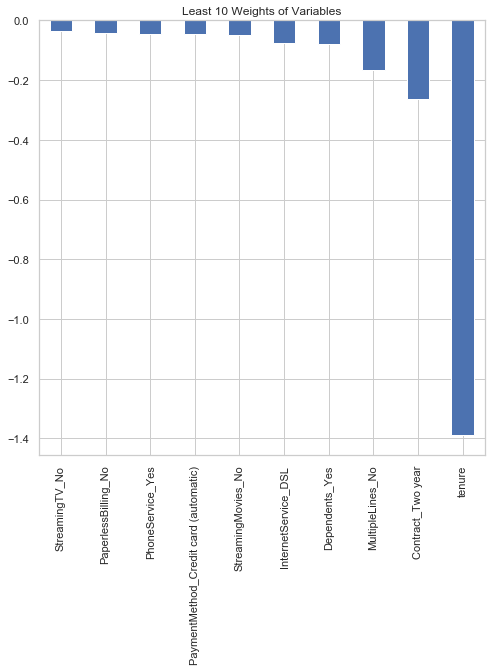

In [96]:
plt.figure(figsize=(8,8))
plt.title('Least 10 Weights of Variables')
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

In [61]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [78]:
fpr, tpr,_=roc_curve(lr_plot.predict(X_test_std),y_test,drop_intermediate=False)

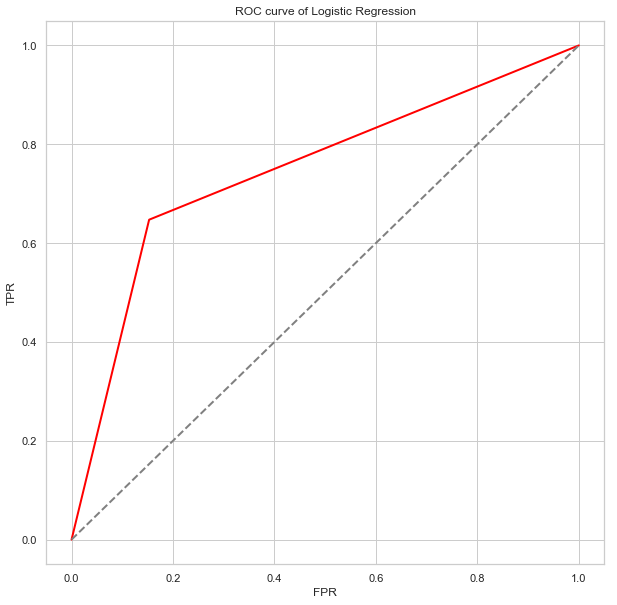

In [98]:
plt.figure(figsize=(10,10))
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression')
plt.show()

In [80]:
roc_auc_score(lr_plot.predict(X_test_std),y_test)

0.747199603298883

### SVM

In [66]:
from sklearn.svm import SVC

In [71]:
svm_para = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]},
                    {'kernel': ['linear'], 'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]}
                   ]

In [72]:
svm = GridSearchCV(estimator=SVC(), param_grid=svm_para, scoring='accuracy', n_jobs=-1, cv=10)

In [73]:
svm.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]}, {'kernel': ['sigmoid'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.05, 0.1, 10, 25, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
y_svm_pred = ppn.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_svm_pred))
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test,y_svm_pred))
print('Best score:', svm.best_score_)
print('Best C:',svm.best_estimator_.C) 
print('Best Kernel:',svm.best_estimator_.kernel)
print('Best Gamma:',svm.best_estimator_.gamma)

Accuracy: 0.7454
[[1187  373]
 [ 165  388]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1560
           1       0.51      0.70      0.59       553

   micro avg       0.75      0.75      0.75      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.75      0.76      2113

Best score: 0.8008113590263691
Best C: 10
Best Kernel: rbf
Best Gamma: 0.001


In [75]:
svm.best_estimator_.get_params()

{'C': 10,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
clf_param = {'max_depth':np.arange(1, 49),
             'criterion': ['gini', 'entropy']
            }
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=clf_param, 
                   scoring='accuracy', n_jobs=-1, cv=10)

In [78]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [79]:
y_clf_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))
print('Best score:', clf.best_score_)

Accuracy: 0.7998
[[1409  151]
 [ 272  281]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.51      0.57       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Best score: 0.7924949290060852


In [80]:
clf.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfl_param = {
    'bootstrap': [True],
    'max_depth': [50, 100, 300, 500, 800, 1000, 1500],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 80, 100, 200, 300, 1000],
    'criterion': ['gini', 'entropy']
}
rfl = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rfl_param, 
                   scoring='accuracy', n_jobs=-1, cv=10)

In [55]:
rfl.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [50, 100, 300, 500, 800, 1000, 1500], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [50, 80, 100, 200, 300, 1000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [85]:
y_rfl_pred = rfl.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))
print('Best score:', clf.best_score_)

Accuracy: 0.7965
[[1414  146]
 [ 284  269]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.49      0.56       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

Best score: 0.7924949290060852


In [86]:
rfl.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1500,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
rfl_plot = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=1500,
                                 max_features=3, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=3, min_samples_split=8,
                                 min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None, random_state=None,
                                 verbose=0, warm_start=False)
rfl_plot.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1500, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
importances = rfl_plot.feature_importances_ 
indices = np.argsort(importances)[::-1]
feat_labels = df_dummies.columns[1:]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) MonthlyCharges                 0.134079
 2) Churn                          0.126889
 3) TotalCharges                   0.083772
 4) Contract_Month-to-month        0.058653
 5) PaymentMethod_Electronic check 0.045018
 6) TechSupport_No                 0.044163
 7) InternetService_Fiber optic    0.031969
 8) Contract_Two year              0.030979
 9) OnlineSecurity_No              0.026770
10) OnlineBackup_No                0.023492
11) Contract_One year              0.022538
12) OnlineSecurity_Yes             0.021955
13) InternetService_DSL            0.021419
14) TechSupport_Yes                0.020722
15) DeviceProtection_No            0.019078
16) OnlineBackup_Yes               0.014852
17) PaperlessBilling_Yes           0.014675
18) PaperlessBilling_No            0.012999
19) Dependents_Yes                 0.012370
20) MultipleLines_Yes              0.012061
21) tenure                         0.011552
22) Dependents_No                  0.011432
23) gender_Male                 

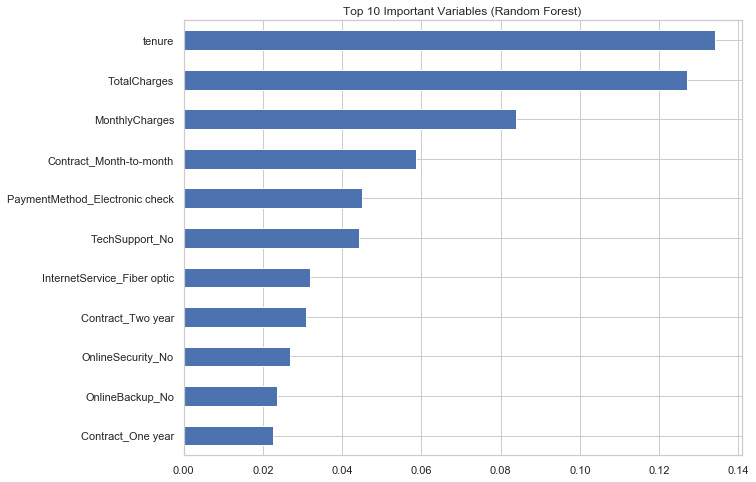

In [99]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Important Variables (Random Forest)')
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-11:].plot(kind = 'barh')

In [100]:
roc_auc_score(rfl_plot.predict(X_test_std),y_test)

0.7429595900766548

### ADA Boost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada_param = [{
    'algorithm':['SAMME', 'SAMME.R'],
    'n_estimators':[50,100,200,500,1000],
    'learning_rate':[0.001, 0.01, 0.05, 0.1,1]
}]
ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=ada_param, scoring='accuracy', n_jobs=-1, cv=10)

In [89]:
ada.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [50, 100, 200, 500, 1000], 'learning_rate': [0.001, 0.01, 0.05, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
y_ada_pred = rfl.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_ada_pred))
print(confusion_matrix(y_test, y_ada_pred))
print(classification_report(y_test,y_ada_pred))
print('Best score:', ada.best_score_)

Accuracy: 0.7965
[[1414  146]
 [ 284  269]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.49      0.56       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

Best score: 0.8081135902636917


### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc_param = [ {'n_estimators': [100, 200, 500, 1000],
'learning_rate':[0.001, 0.01, 0.1, 0.5, 1], 'max_depth': [1,2,3,4,5,6]}
]
gbc = GridSearchCV(GradientBoostingClassifier(), param_grid=gbc_param, scoring='accuracy', n_jobs=-1, cv=10)

In [73]:
gbc.fit(X_train_std, y_train)

KeyboardInterrupt: 

In [94]:
y_gbc_pred = gbc.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_gbc_pred))
print(confusion_matrix(y_test, y_gbc_pred))
print(classification_report(y_test,y_gbc_pred))
print('Best score:', gbc.best_score_)

Accuracy: 0.8055
[[1395  165]
 [ 246  307]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.65      0.56      0.60       553

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.75      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

Best score: 0.8085192697768763


In [95]:
gbc.best_estimator_.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Neural Network

In [96]:
from sklearn.neural_network import MLPClassifier

In [107]:
nn_param = [{
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter': [100, 300, 500, 1000], 
    'alpha': 10.0 ** -np.arange(1, 10),
    'solver': ['lbfgs', 'sgd', 'adam']}]
nn = GridSearchCV(MLPClassifier(), param_grid=nn_param, scoring='accuracy', n_jobs=-1, cv=10)

In [108]:
nn.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'max_iter': [100, 300, 500, 1000], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]), 'solver': ['lbfgs', 'sgd', 'adam']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [109]:
y_nn_pred = rfl.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_nn_pred))
print(confusion_matrix(y_test, y_nn_pred))
print(classification_report(y_test,y_nn_pred))
print('Best score:', nn.best_score_)

Accuracy: 0.7965
[[1414  146]
 [ 284  269]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1560
           1       0.65      0.49      0.56       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113

Best score: 0.804868154158215


In [110]:
nn.best_estimator_.get_params()

{'activation': 'identity',
 'alpha': 1e-08,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier()

In [54]:
xgb.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [58]:
y_xgb_pred = xgb.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_xgb_pred))
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test,y_xgb_pred))
print('Best score:', xgb.best_score_)

Accuracy: 0.7984
[[1390  170]
 [ 256  297]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1560
           1       0.64      0.54      0.58       553

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



AttributeError: 'XGBClassifier' object has no attribute 'best_score_'